In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn import datasets
import warnings

warnings.filterwarnings("ignore")

In [2]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [3]:
X_train.shape

(120, 2)

In [4]:
X_test.shape

(30, 2)

In [5]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [6]:
lr = LogisticRegression(C=1000.0, random_state=99)
lr.fit(X_train_std, y_train)

LogisticRegression(C=1000.0, random_state=99)

In [7]:
X_test_std[:1,]

array([[0.94476368, 1.91948971]])

In [8]:
lr.predict_proba(X_test_std[:1,:])

array([[3.51033078e-20, 2.40601303e-06, 9.99997594e-01]])

In [9]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):    
    markers = ('s', '*', '^', 'o', 'v')    
    colors = cm.rainbow(np.linspace(0, 1, len(np.unique(y))))
    colors_map = 'Paired'
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1    
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                           np.arange(x2_min, x2_max, resolution))    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)   
    plt.figure(figsize=(15,10))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=colors_map)    
    plt.xlim(xx1.min(), xx1.max())    
    plt.ylim(xx2.min(), xx2.max())    
    for idx, cl in enumerate(np.unique(y)):        
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],alpha=0.8, 
                    cmap=colors_map,marker=markers[idx], label=cl)    
        if test_idx:        
            plt.scatter(x=X_test_std[y_test == cl, 0], y=X_test_std[y_test == cl, 1], cmap=colors_map, alpha=1.0, 
                        linewidth=1, marker='o', s=100,label=cl)

訓練誤差 0.95


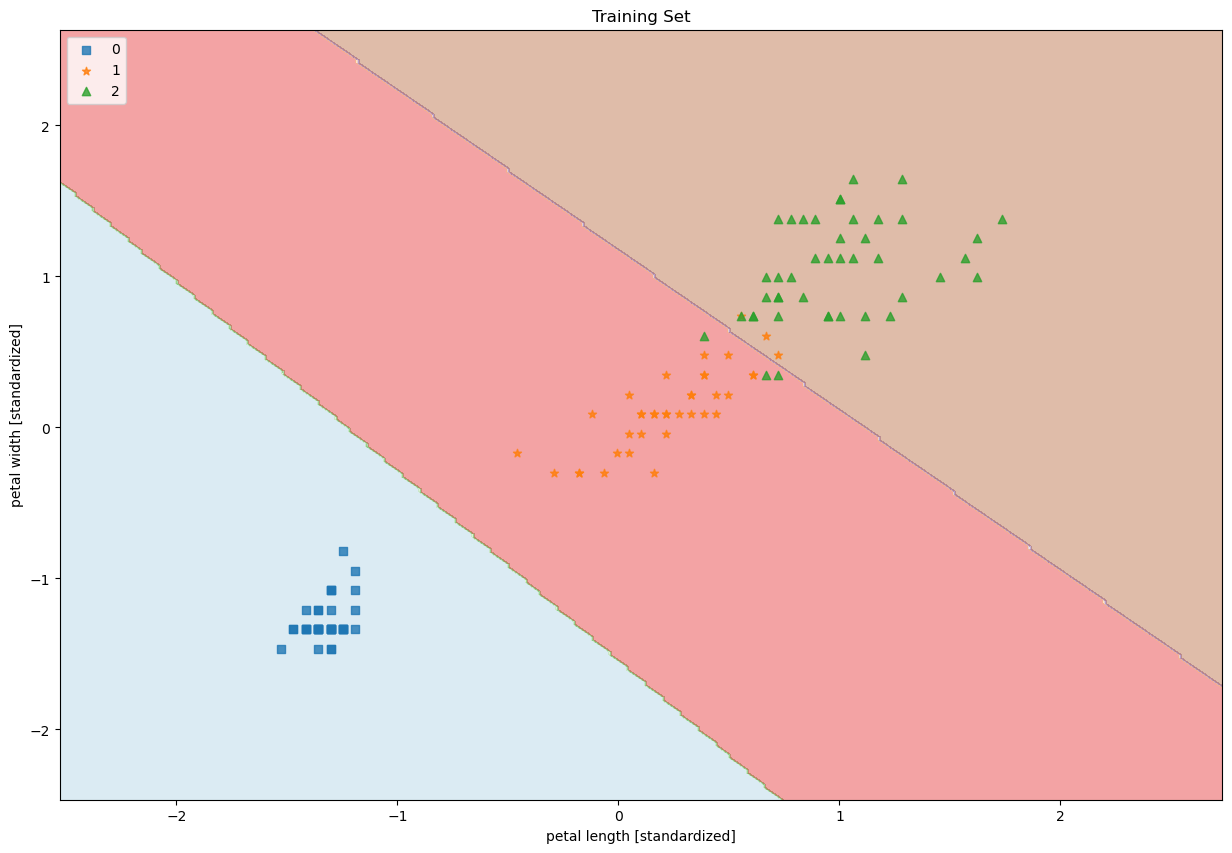

In [10]:
print("訓練誤差",lr.score(X_train_std,y_train))
plot_decision_regions(X_train_std, y_train, classifier=lr)
plt.title('Training Set')
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

一般誤差 0.7666666666666667


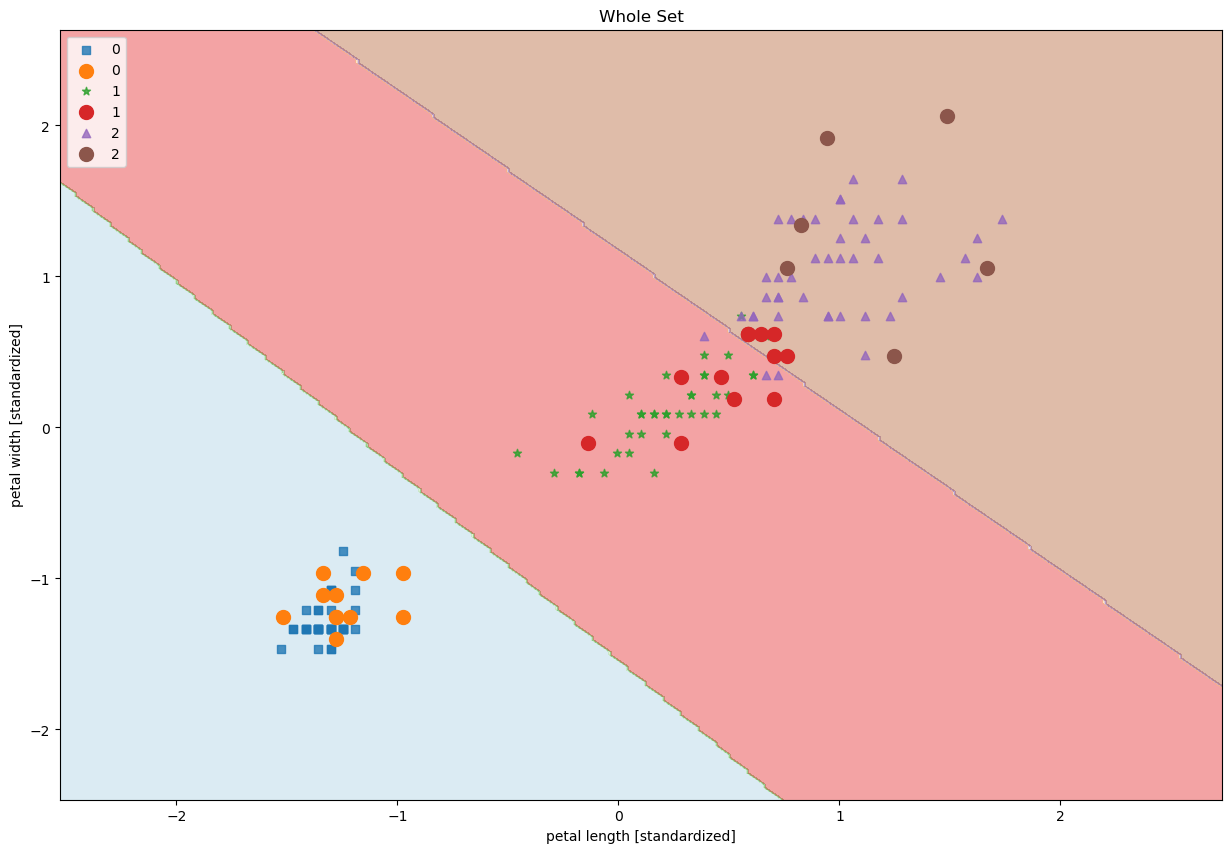

In [11]:
print("一般誤差",lr.score(X_test_std,y_test))
plot_decision_regions(X_train_std, y_train, classifier=lr, test_idx=True)
plt.title('Whole Set')
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [12]:
y_pred = lr.predict(X_test_std)
cmat = confusion_matrix(y_test, y_pred)
cmat

array([[11,  0,  0],
       [ 0,  6,  7],
       [ 0,  0,  6]], dtype=int64)

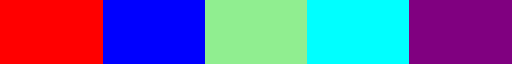

In [13]:
colors = ('red', 'blue', 'lightgreen', 'cyan', 'purple')    
cmap_colors = ListedColormap(colors) 
cmap_colors

In [14]:
lr10000 = LogisticRegression(C=10000.0, random_state=99)
lr10000.fit(X_train_std, y_train)

LogisticRegression(C=10000.0, random_state=99)

訓練誤差 0.95


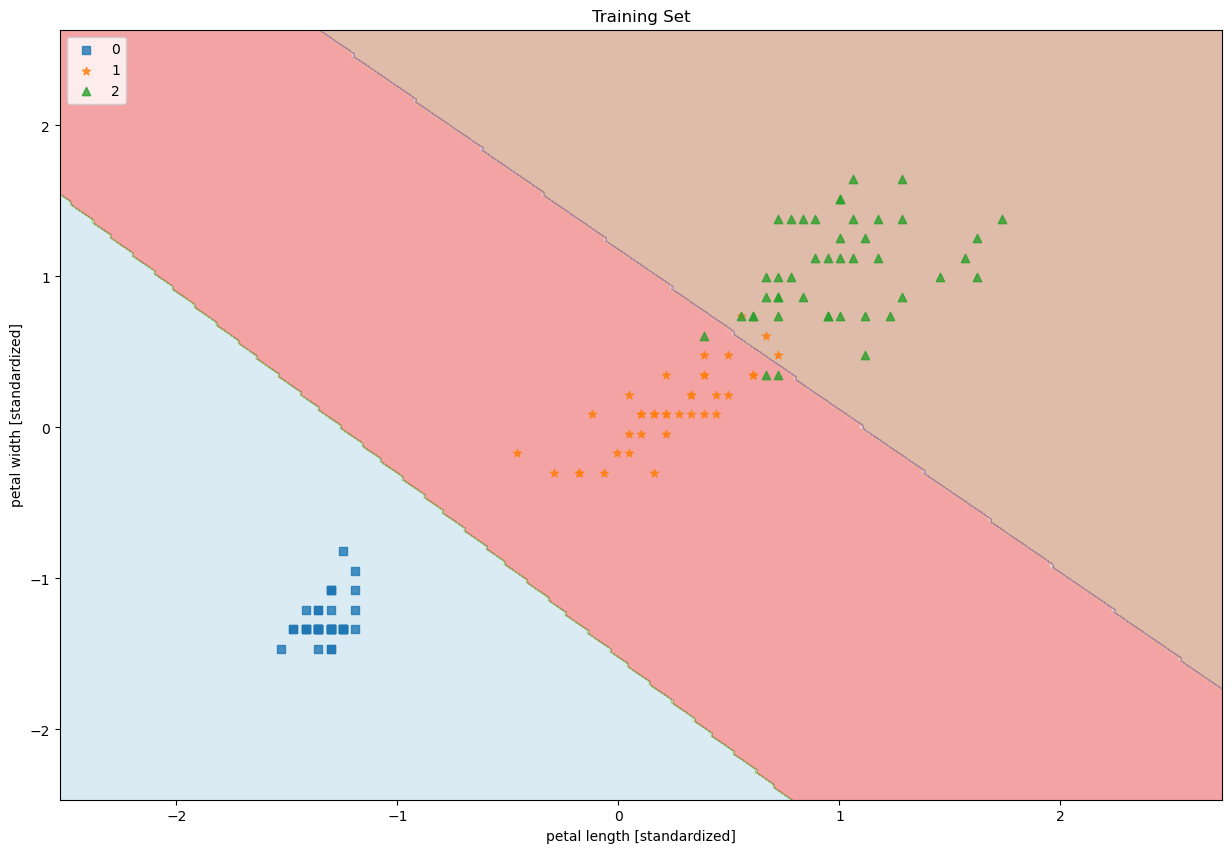

In [15]:
print("訓練誤差",lr.score(X_train_std,y_train))
plot_decision_regions(X_train_std, y_train, classifier=lr10000)
plt.title('Training Set')
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

一般誤差 0.7666666666666667


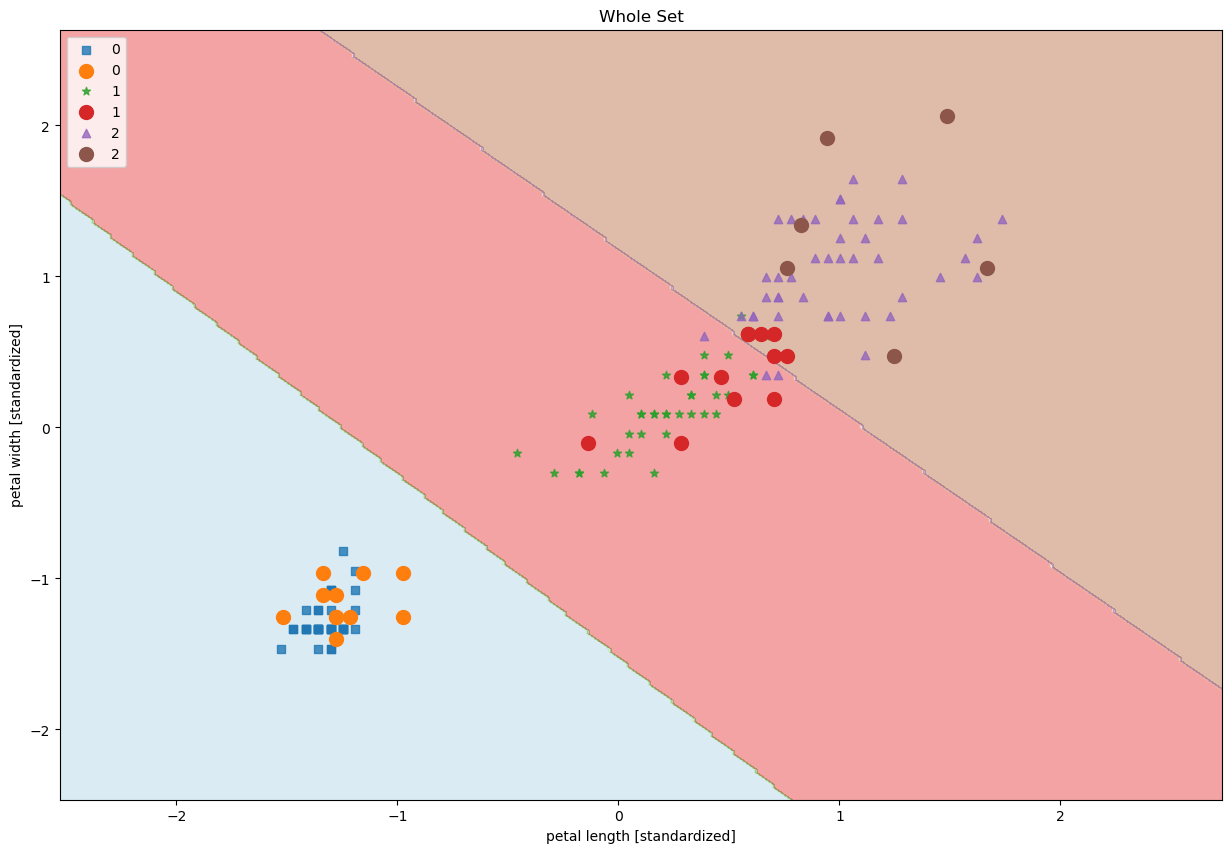

In [16]:
print("一般誤差",lr.score(X_test_std,y_test))
plot_decision_regions(X_train_std, y_train, classifier=lr10000, test_idx=True)
plt.title('Whole Set')
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()